<a href="https://colab.research.google.com/github/mahhasan77/Speech-Emotion-Recognication/blob/main/Speech_Emotion_Recognition_20047638_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                             Data Science Project 
##                                     Recognition of Emotions Using Speech
######                                        Student ID: 20047638

The objective of this project is to a comparitive research on the topic of detecting emotion in speeches using the model CNN, RNN, MLP and SVM comparing their accuracy, predictive quality and training-testing speed when trained on the same dataset.

## Importing and Loading Data

In [ ]:
# Importing all the necessary libraries

# Importing Numpy, Pandas, Tensforflow, Keras Libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, Activation, LSTM
from keras.callbacks import ModelCheckpoint

import librosa
import librosa.display
from matplotlib.pyplot import specgram


import os
import sys
import warnings
import keras

# Importing sklearn library
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import time

# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

The datasets CREMA-D and TESS are taken from kaggle. Here, the datasets are first imported to the google colab and then converted and merged into one dataframe

In [ ]:
# Install Kaggle API to be able to access Kaggle datasets
!pip install kaggle
from google.colab import files
files_upload = files.upload()

for fn in files_upload.keys():
  print('The uploaded file name: "{name}" with length {length} bytes'.format(
      name=fn, length=len(files_upload[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json
The uploaded file name: "kaggle.json" with length 68 bytes


We first start with the CREMA-D dataset. The dataset is downloaded and then converted to a dataframe.

In [ ]:
# Downloading CREMA-D dataset and unzipping to make it available in 
# the google colab directory
!kaggle datasets download "ejlok1/cremad"
!unzip cremad.zip

Streaming output truncated to the last 5000 lines.
  inflating: AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: AudioWAV/1031_IEO_HAP_HI.wav  
  inflating: AudioWAV/1031_IEO_HAP_LO.wav  
  inflating: AudioWAV/1031_IEO_HAP_MD.wav  
  inflating: AudioWAV/1031_IEO_NEU_XX.wav  
  inflating: AudioWAV/1031_IEO_SAD_HI.wav  
  inflating: AudioWAV/1031_IEO_SAD_LO.wav  
  inflating: AudioWAV/1031_IEO_SAD_MD.wav  
  inflating: AudioWAV/103

In [ ]:
# Creating dataframe with the given data
crema = '/content/AudioWAV'
crema_directory_list = os.listdir(crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(crema + '/' + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,fear,/content/AudioWAV/1054_TIE_FEA_XX.wav
1,disgust,/content/AudioWAV/1079_ITH_DIS_XX.wav
2,disgust,/content/AudioWAV/1040_IEO_DIS_LO.wav
3,fear,/content/AudioWAV/1087_WSI_FEA_XX.wav
4,angry,/content/AudioWAV/1033_DFA_ANG_XX.wav


Now, we download the TESS dataset and create a dataframe 

In [ ]:
# Downloading TESS dataset and unzipping to make it available in 
# the google colab directory
!kaggle datasets download "ejlok1/toronto-emotional-speech-set-tess"
!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
# Creating dataframe with the given data
Tess = '/content/TESS Toronto emotional speech set data'
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + '/'+ dir) #Tess +
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,/content/TESS Toronto emotional speech set dat...
1,angry,/content/TESS Toronto emotional speech set dat...
2,angry,/content/TESS Toronto emotional speech set dat...
3,angry,/content/TESS Toronto emotional speech set dat...
4,angry,/content/TESS Toronto emotional speech set dat...


Merging data into one dataframe

In [ ]:
# creating a Dataframe using the 2 dataframes created.
audiopath_data = pd.concat([Crema_df, Tess_df], axis = 0)
audiopath_data.to_csv("data_path.csv",index=False)
audiopath_data.head()

,Emotions,Path
0,happy,/content/AudioWAV/1054_IWW_HAP_XX.wav
1,sad,/content/AudioWAV/1056_DFA_SAD_XX.wav
2,sad,/content/AudioWAV/1020_IEO_SAD_LO.wav
3,fear,/content/AudioWAV/1088_TAI_FEA_XX.wav
4,neutral,/content/AudioWAV/1003_WSI_NEU_XX.wav


Text(0, 0.5, 'Amplitude')

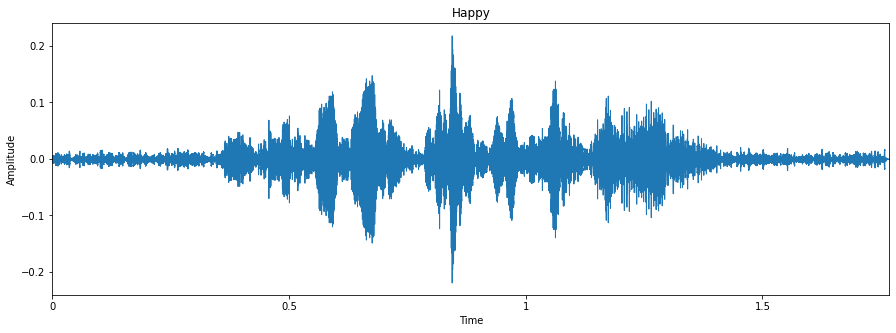

In [ ]:
# Plotting an audio file waveplot to view the data - CREMA-D/Happy

file_name = '/content/AudioWAV/1054_IWW_HAP_XX.wav'
data, sampling_rate = librosa.load(file_name)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Happy')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

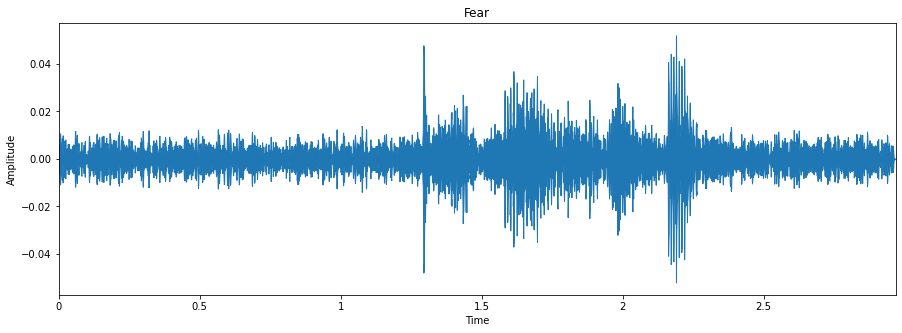

In [ ]:
# Plotting an audio file waveplot to view the data - CREMA-D/Fear
  
file_name = '/content/AudioWAV/1088_TAI_FEA_XX.wav'
data, sampling_rate = librosa.load(file_name)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)
plt.title('Fear')
plt.ylabel('Amplitude')

## Feature Extraction
Now, We extract the features, from the given audio files in the dataframes

In [ ]:
## Code taken from Kaggle##
# Definitions of functions to be used for feature extraction
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

def higher_speed(data, speed_factor = 1.25):
    return librosa.effects.time_stretch(data, speed_factor)

def lower_speed(data, speed_factor = 0.75):
    return librosa.effects.time_stretch(data, speed_factor)  

In [ ]:
## Code taken from Kaggle##
# Extracting Features using MFCCs
def extract_features(data):
    result = np.array([])
    mfccs = librosa.feature.mfcc(y=data, sr=22050, n_mfcc=58)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    result = np.array(mfccs_processed)
     
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=3, offset=0.5, res_type='kaiser_fast') 
    
    #without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    #noised
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    #stretched
    stretch_data = stretch(data)
    res3 = extract_features(stretch_data)
    result = np.vstack((result, res3))
    
    #shifted
    shift_data = shift(data)
    res4 = extract_features(shift_data)
    result = np.vstack((result, res4))
    
    #pitched
    pitch_data = pitch(data, sample_rate)
    res5 = extract_features(pitch_data)
    result = np.vstack((result, res5)) 
    
    #speed up
    higher_speed_data = higher_speed(data)
    res6 = extract_features(higher_speed_data)
    result = np.vstack((result, res6))
    
    #speed down
    lower_speed_data = higher_speed(data)
    res7 = extract_features(lower_speed_data)
    result = np.vstack((result, res7))
    
    return result

In [ ]:
## Code taken from Kaggle##
## Calling the above defined functions for feature extraction
X_features, Y_labels = [], []
for path, emotion in zip(audiopath_data.Path, audiopath_data.Emotions):
    feature = get_features(path)
    for elements in feature:
        X_features.append(elements)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y_labels.append(emotion)

In [ ]:
## Creating a dataframe with features 
Features_DF = pd.DataFrame(X_features)
Features_DF['labels'] = Y_labels
Features_DF.to_csv('features.csv', index=False)
Features_DF.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,labels
0,-372.859833,158.552551,-5.121318,38.753338,-12.569175,10.467646,-17.361149,-3.500664,-10.303802,-4.179052,...,-1.381174,-2.042949,1.837421,1.657918,0.566097,-1.257396,0.720487,0.583880,-0.416481,happy
1,-235.423931,50.915942,23.368699,9.832177,3.868557,-3.130746,-7.366017,-7.309678,-5.633727,-1.876884,...,-1.490963,-0.792193,1.351382,1.874680,1.227344,-0.322267,0.022354,0.403106,0.347753,happy
2,-406.562378,157.783981,-6.387405,38.337200,-13.279373,8.636255,-18.171515,-3.022032,-11.198946,-4.556575,...,-1.518174,-2.668355,2.245246,2.427523,0.823384,-1.348275,0.238677,-0.240282,-0.816654,happy
3,-371.539337,157.163910,-4.820157,38.652512,-12.831516,10.374809,-17.519386,-3.489297,-10.154447,-4.095973,...,-1.122553,-1.963099,1.756755,1.659529,0.455819,-1.483385,0.584549,0.539375,-0.461644,happy
4,-397.103271,153.161499,-4.517867,33.218170,-14.287848,3.471455,-20.819828,-1.789339,-13.161255,0.570050,...,-0.895595,3.226112,1.632907,-0.618676,-1.663640,0.268855,0.967008,-1.187821,1.405884,happy


## Data Preparation 

In [ ]:
# Rereading the saved features from the features csv
Features_DF = pd.read_csv('features.csv')
X_features = Features_DF.iloc[: ,:-1].values
Y_labels = Features_DF['labels'].values
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Nuetral', 'Sad', 'Surprise']

In [ ]:
# As this is a multiclass classification, using onehotencoder for our labels.
label_encoder = OneHotEncoder()
Y_labels = label_encoder.fit_transform(np.array(Y_labels)
                                         .reshape(-1,1))\
                                         .toarray()


In [ ]:
# splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X_features, 
                                                    Y_labels, 
                                                    random_state=0, 
                                                    shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((53770, 58), (53770, 7), (17924, 58), (17924, 7))

In [ ]:
# scaling our data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((53770, 58), (53770, 7), (17924, 58), (17924, 7))

## Building Models for our dataset

### CNN Model
Now, we build the CNN model and train it using the given train data. This model will then be validated against the test data from our dataset

In [ ]:
# reshaping the data for CNN model compatibility
x_train_cnn = np.expand_dims(x_train, axis=2)
x_test_cnn = np.expand_dims(x_test, axis=2)
y_train_cnn = y_train
y_test_cnn = y_test
x_train_cnn.shape, y_train_cnn.shape, x_test_cnn.shape, y_test_cnn.shape

((53770, 58, 1), (53770, 7), (17924, 58, 1), (17924, 7))

In [ ]:
# CNN Model 
from tensorflow import keras
CNN_model = Sequential()
CNN_model.add(Conv1D(256, 5,padding='same',
                 input_shape=(x_train.shape[1],1)))
CNN_model.add(Activation('relu'))
CNN_model.add(Conv1D(128, 5,padding='same'))
CNN_model.add(Activation('relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(MaxPooling1D(pool_size=(8)))
CNN_model.add(Conv1D(128, 5,padding='same',))
CNN_model.add(Activation('relu'))
CNN_model.add(Conv1D(128, 5,padding='same',))
CNN_model.add(Activation('relu'))
CNN_model.add(Flatten())
CNN_model.add(Dense(7))
CNN_model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.01, decay=1e-6)
CNN_model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 58, 256)           1536      
                                                                 
 activation (Activation)     (None, 58, 256)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 58, 128)           163968    
                                                                 
 activation_1 (Activation)   (None, 58, 128)           0         
                                                                 
 dropout (Dropout)           (None, 58, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 128)           0         
 )                                                               
                                                        

In [ ]:
# Training the CNN model on our training data
learning_rate = ReduceLROnPlateau(monitor='loss', 
                                  factor=0.4, 
                                  verbose=0, 
                                  patience=2, 
                                  min_lr=0.0000001)
starting_time = time.time()
history_CNN = CNN_model.fit(x_train_cnn, y_train_cnn, 
                            batch_size=256, 
                            epochs=50, 
                            validation_data=(x_test_cnn, y_test_cnn), 
                            callbacks=[learning_rate])
print("CNN model trained in %s s " % str(time.time() - starting_time))

Epoch 1/50
211/211 [==============================] - 99s 465ms/step - loss: 3.0453 - accuracy: 0.4399 - val_loss: 1.3161 - val_accuracy: 0.4857 - lr: 0.0100
Epoch 2/50
211/211 [==============================] - 98s 463ms/step - loss: 1.0602 - accuracy: 0.5693 - val_loss: 1.0583 - val_accuracy: 0.5695 - lr: 0.0100
Epoch 3/50
211/211 [==============================] - 98s 464ms/step - loss: 0.9942 - accuracy: 0.6021 - val_loss: 1.0262 - val_accuracy: 0.5863 - lr: 0.0100
Epoch 4/50
211/211 [==============================] - 98s 463ms/step - loss: 0.9447 - accuracy: 0.6244 - val_loss: 1.1290 - val_accuracy: 0.5985 - lr: 0.0100
Epoch 5/50
211/211 [==============================] - 98s 465ms/step - loss: 0.9032 - accuracy: 0.6436 - val_loss: 0.9819 - val_accuracy: 0.6024 - lr: 0.0100
Epoch 6/50
211/211 [==============================] - 98s 463ms/step - loss: 0.8677 - accuracy: 0.6607 - val_loss: 2.3509 - val_accuracy: 0.4935 - lr: 0.0100
Epoch 7/50
211/211 [==============================] 

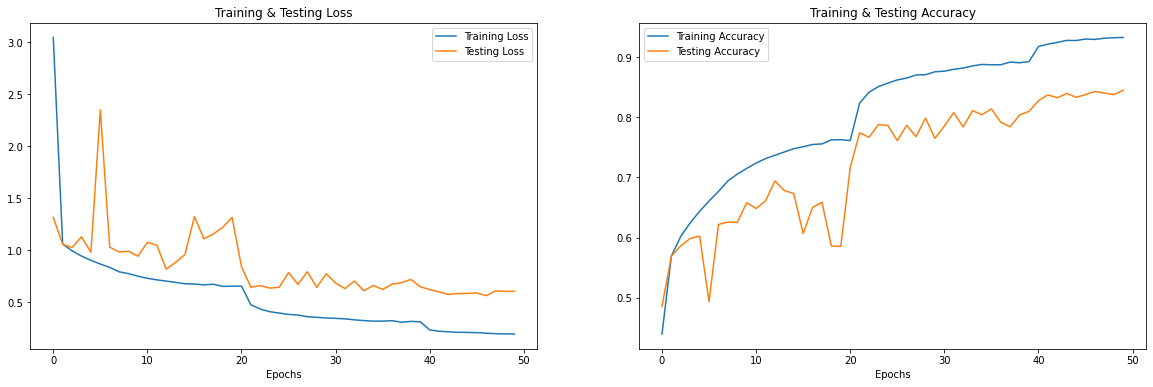

In [ ]:
# Plotting the graphs for training and test accuracy
epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history_CNN.history['accuracy']
train_loss = history_CNN.history['loss']
test_acc = history_CNN.history['val_accuracy']
test_loss = history_CNN.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
# Determining the predictive quality of the network
starting_time = time.time()
y_pred_cnn = CNN_model.predict(x_test_cnn)
print("CNN model tested in %s s " % str(time.time() - starting_time))

y_pred_cnn = label_encoder.inverse_transform(y_pred_cnn)
ytest_dec_cnn = label_encoder.inverse_transform(y_test_cnn)

print('The actual emotions:', ytest_dec_cnn, 'The predicted emotions:', y_pred_cnn)

CNN model tested in 7.4804136753082275 s 
The actual emotions: [['angry']
 ['fear']
 ['angry']
 ...
 ['neutral']
 ['disgust']
 ['neutral']] The predicted emotions: [['angry']
 ['fear']
 ['angry']
 ...
 ['neutral']
 ['disgust']
 ['neutral']]


In [ ]:
# Determining the accuracy of our model
accuracy_CNN = accuracy_score(y_true = ytest_dec_cnn ,
                             y_pred = y_pred_cnn)
# Printing the accuracy of our MLP model
print("Accuracy: {:.2f}%".format(accuracy_CNN*100))

Accuracy: 84.47%


### MLP (Multi-Layer Perceptron) Model

In [ ]:
# Initialising the train and test data
x_train_mlp = x_train
x_test_mlp = x_test
y_train_mlp = y_train
y_test_mlp = y_test

In [ ]:
# Defining the Multi Layer Perceptron Classifier
MLP_model = MLPClassifier(alpha=0.06, 
                          batch_size=256, 
                          epsilon=1e-08, 
                          hidden_layer_sizes=(250, 150),
                          learning_rate='adaptive', 
                          max_iter=400)

In [ ]:
# Training the MLP model against the training data
import time
starting_time = time.time()
MLP_model.fit(x_train_mlp,y_train_mlp)
print("MLP model trained in %s s " % str(time.time() - starting_time))

MLP model trained in 393.80851912498474 s 


In [ ]:
# Testing the predictive quality of the model:
starting_time = time.time()
y_pred_mlp = MLP_model.predict(x_test_mlp)
print("MLP model tested in %s s " % str(time.time() - starting_time))

df_temp = pd.DataFrame(y_pred_mlp)

for row in range(len(df_temp)):
  if np.sum(df_temp.loc[row,:]) == 0:
     df_temp.loc[row,2] = 1

y_pred_mlp = pd.DataFrame.to_numpy(df_temp)    
print(y_pred_mlp)

y_pred_mlp = label_encoder.inverse_transform(y_pred_mlp)
y_test_mlp = label_encoder.inverse_transform(y_test_mlp)

print('The actual emotions:', y_test_mlp)
print('The predicted emotions:', y_pred_mlp)


MLP model tested in 0.19156312942504883 s 
[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
The actual emotions: [['angry']
 ['fear']
 ['angry']
 ...
 ['neutral']
 ['disgust']
 ['neutral']]
The predicted emotions: [['angry']
 ['fear']
 ['angry']
 ...
 ['neutral']
 ['disgust']
 ['neutral']]


In [ ]:
# Determining the accuracy of our model
accuracy_MLP = accuracy_score(y_true = y_test_mlp,
                              y_pred = y_pred_mlp)
# Printing the accuracy of our MLP model
print("Accuracy: {:.2f}%".format(accuracy_MLP*100))

Accuracy: 86.29%


### SVM (Support Vector Machine) Model

In [ ]:
# Rereading the saved features from the features csv
Features_DF = pd.read_csv('features.csv')
X_features = Features_DF.iloc[: ,:-1].values
Y_labels = Features_DF['labels'].values

In [ ]:
# Initialising the train and test data
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(X_features, 
                                                                    Y_labels, 
                                                                    test_size = 0.20)

In [ ]:
# scaling our data
scaler = StandardScaler()
x_train_svm = scaler.fit_transform(x_train_svm)
x_test_svm = scaler.transform(x_test_svm)
x_train_svm.shape, y_train_svm.shape, x_test_svm.shape, y_test_svm.shape

((57355, 58), (57355,), (14339, 58), (14339,))

In [ ]:
from sklearn.svm import SVC

svmclassifier = SVC(kernel = 'rbf')

In [ ]:
import time
starting_time = time.time()
svmclassifier.fit(x_train_svm, y_train_svm)
print("Trained model in %s s " % str(time.time() - starting_time))

Trained model in 369.50613021850586 s 


In [ ]:
# Predictive model
starting_time = time.time()
y_pred_svm = svmclassifier.predict(x_test_svm)
print("Tested model in %s s " % str(time.time() - starting_time))
print('Predicted values: ',y_pred_svm[:10])
print('Actual values: ', y_test_svm[:10])

Tested model in 73.30016803741455 s 
Predicted values:  ['sad' 'fear' 'disgust' 'fear' 'fear' 'disgust' 'fear' 'angry' 'disgust'
 'sad']
Actual values:  ['sad' 'sad' 'disgust' 'fear' 'fear' 'disgust' 'fear' 'disgust' 'disgust'
 'sad']


In [ ]:
acc = float(accuracy_score(y_test_svm,y_pred_svm))*100
print("----accuracy score %s ----" % acc)

----accuracy score 72.80842457633028 ----


### LSTM (Long Short Term Memory) Model

In [ ]:
# Rereading the saved features from the features csv
Features_DF = pd.read_csv('features.csv')
X_features = Features_DF.iloc[: ,:-1].values
Y_labels = Features_DF['labels'].values

In [ ]:
# As this is a multiclass classification, using onehotencoder for our labels.
label_encoder = OneHotEncoder()
Y_labels = label_encoder.fit_transform(np.array(Y_labels)
                                         .reshape(-1,1))\
                                         .toarray()

In [ ]:
x_train_rnn, x_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
                                                    X_features, 
                                                    Y_labels, 
                                                    test_size=0.2)
x_train_rnn, x_validation_rnn, y_train_rnn, y_validation_rnn = train_test_split(
                                                                x_train_rnn,
                                                                y_train_rnn,
                                                                test_size=0.1)


# making our data compatible to model.
x_train_rnn = np.expand_dims(x_train_rnn, axis=-1)
x_test_rnn = np.expand_dims(x_test_rnn, axis=-1)
x_validation_rnn = np.expand_dims(x_validation_rnn, axis=-1)
x_train_rnn.shape, x_test_rnn.shape, y_train_rnn.shape, y_test_rnn.shape

((51619, 58, 1), (14339, 58, 1), (51619, 7), (14339, 7))

In [ ]:
# Building the RNN model
model_RNN = Sequential()
model_RNN.add(LSTM(200, input_shape=(x_train_rnn.shape[1], x_train_rnn.shape[2],),)) 
model_RNN.add(Dropout(0.5)) 
model_RNN.add(Dense(512)) 
model_RNN.add(Dense(512))
model_RNN.add(Dense(y_train_rnn.shape[1], activation='softmax'))

model_RNN.summary()
model_RNN.compile(loss='binary_crossentropy', optimizer='Nadam', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 200)               161600    
                                                                 
 dropout_5 (Dropout)         (None, 200)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               102912    
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 dense_17 (Dense)            (None, 7)                 3591      
                                                                 
Total params: 530,759
Trainable params: 530,759
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Defining callbacks - learning rate
learning_rate_rnn = ReduceLROnPlateau(monitor='loss', 
                                  factor=0.4, 
                                  verbose=0, 
                                  patience=2, 
                                  min_lr=0.000001)

In [ ]:
starting_time = time.time()
history_rnn = model_RNN.fit(x_train_rnn, y_train_rnn, 
                         validation_data=(x_validation_rnn, y_validation_rnn), 
                         batch_size= 128, 
                         epochs=60,
                         callbacks = [learning_rate_rnn])
print("RNN-LSTM model trained in %s s " % str(time.time() - starting_time))

Epoch 1/60
454/454 [==============================] - 64s 138ms/step - loss: 0.3259 - accuracy: 0.3891 - val_loss: 0.2757 - val_accuracy: 0.5061 - lr: 0.0010
Epoch 2/60
454/454 [==============================] - 62s 137ms/step - loss: 0.2649 - accuracy: 0.5154 - val_loss: 0.2499 - val_accuracy: 0.5498 - lr: 0.0010
Epoch 3/60
454/454 [==============================] - 62s 136ms/step - loss: 0.2500 - accuracy: 0.5503 - val_loss: 0.2334 - val_accuracy: 0.5845 - lr: 0.0010
Epoch 4/60
454/454 [==============================] - 62s 136ms/step - loss: 0.2400 - accuracy: 0.5734 - val_loss: 0.2307 - val_accuracy: 0.5924 - lr: 0.0010
Epoch 5/60
454/454 [==============================] - 62s 137ms/step - loss: 0.2328 - accuracy: 0.5930 - val_loss: 0.2322 - val_accuracy: 0.5889 - lr: 0.0010
Epoch 6/60
454/454 [==============================] - 62s 136ms/step - loss: 0.2272 - accuracy: 0.6088 - val_loss: 0.2174 - val_accuracy: 0.6205 - lr: 0.0010
Epoch 7/60
454/454 [==============================] 

454/454 [==============================] - 65s 143ms/step - loss: 0.0364 - accuracy: 0.9561 - val_loss: 0.1055 - val_accuracy: 0.8779 - lr: 0.0010
Epoch 53/60
454/454 [==============================] - 65s 144ms/step - loss: 0.0400 - accuracy: 0.9522 - val_loss: 0.1041 - val_accuracy: 0.8835 - lr: 0.0010
Epoch 54/60
454/454 [==============================] - 64s 142ms/step - loss: 0.0365 - accuracy: 0.9562 - val_loss: 0.1049 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 55/60
454/454 [==============================] - 64s 141ms/step - loss: 0.0175 - accuracy: 0.9796 - val_loss: 0.1016 - val_accuracy: 0.9070 - lr: 4.0000e-04
Epoch 56/60
454/454 [==============================] - 65s 143ms/step - loss: 0.0114 - accuracy: 0.9873 - val_loss: 0.1102 - val_accuracy: 0.9070 - lr: 4.0000e-04
Epoch 57/60
454/454 [==============================] - 64s 141ms/step - loss: 0.0117 - accuracy: 0.9874 - val_loss: 0.1154 - val_accuracy: 0.9033 - lr: 4.0000e-04
Epoch 58/60
454/454 [=========================

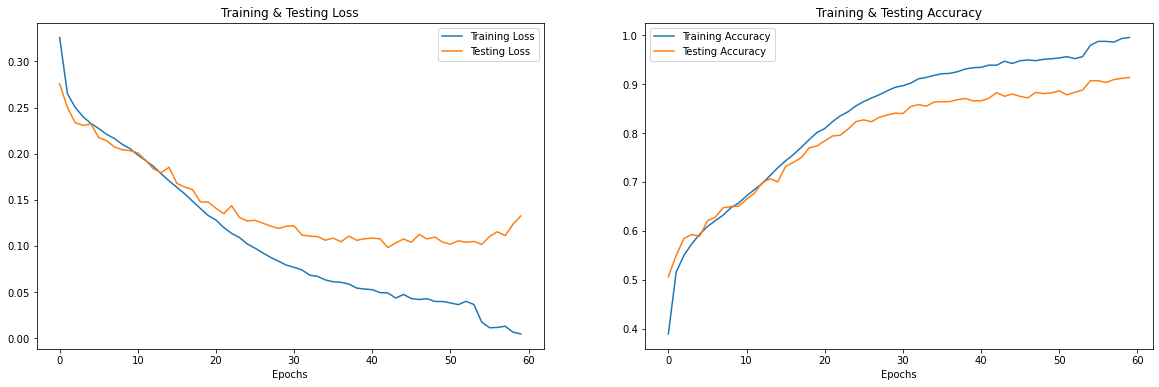

In [ ]:
# Plotting the graphs for training and test accuracy
epochs = [i for i in range(60)]
fig , ax = plt.subplots(1,2)
train_acc_rnn = history_rnn.history['accuracy']
train_loss_rnn = history_rnn.history['loss']
test_acc_rnn = history_rnn.history['val_accuracy']
test_loss_rnn = history_rnn.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss_rnn , label = 'Training Loss')
ax[0].plot(epochs , test_loss_rnn , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc_rnn , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc_rnn , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
test_loss, test_acc = model_RNN.evaluate(x_test_rnn, y_test_rnn, verbose=0)
print("Test Accuracy: ",test_acc*100)

Test Accuracy:  98.13560843467712


In [ ]:

starting_time = time.time()
y_pred_rnn = model_RNN.predict(x_test_rnn)
print("RNN-LSTM model tested in %s s " % str(time.time() - starting_time))

y_pred_rnn = label_encoder.inverse_transform(y_pred_rnn)
y_test_rnn = label_encoder.inverse_transform(y_test_rnn)

print('The actual emotions:', y_test_rnn[:10])
print('The predicted emotions:', y_pred_rnn[:10])

RNN-LSTM model tested in 2.2305257320404053 s 
The actual emotions: [['neutral']
 ['happy']
 ['neutral']
 ['happy']
 ['happy']
 ['angry']
 ['angry']
 ['disgust']
 ['sad']
 ['fear']]
The predicted emotions: [['neutral']
 ['happy']
 ['neutral']
 ['disgust']
 ['happy']
 ['angry']
 ['angry']
 ['disgust']
 ['sad']
 ['fear']]


In [ ]:
# Determining the accuracy of our model
accuracy_RNN = accuracy_score(y_true = y_test_rnn,
                             y_pred = y_pred_rnn)
# Printing the accuracy of our RNN model
print("Accuracy: {:.2f}%".format(accuracy_RNN*100))

Accuracy: 98.14%


# Accuracy of the Given models and their comparision

#### Analysing Model Performances

              precision    recall  f1-score   support

       angry       0.89      0.90      0.90      2894
     disgust       0.80      0.80      0.80      2933
        fear       0.84      0.83      0.83      2866
       happy       0.85      0.82      0.84      2975
     neutral       0.82      0.83      0.82      2690
         sad       0.83      0.86      0.84      2887
    surprise       0.99      0.99      0.99       679

    accuracy                           0.84     17924
   macro avg       0.86      0.86      0.86     17924
weighted avg       0.84      0.84      0.84     17924

----accuracy score 84.47333184557019 ----


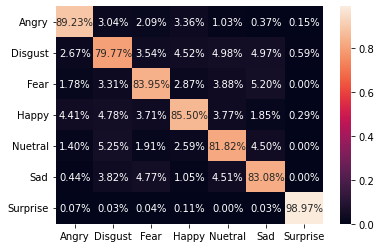

In [ ]:
# CNN Model

## Classification report 
print(classification_report(ytest_dec_cnn,y_pred_cnn))
class_cnn = classification_report(ytest_dec_cnn,y_pred_cnn, output_dict=True)

class_cnn = pd.DataFrame(class_cnn).transpose()
class_cnn.to_csv('Class_cnn.csv', index = True)
acc = float(accuracy_score(ytest_dec_cnn,y_pred_cnn))*100
print("----accuracy score %s ----" % acc)

## Confusion matrix and its heatmap
cm_cnn = confusion_matrix(ytest_dec_cnn,y_pred_cnn)
df_cm_cnn = pd.DataFrame(cm_cnn)
df_cm_cnn.to_csv('CNN.csv', index = False)
sn.heatmap(df_cm_cnn/np.sum(df_cm_cnn), 
           annot= True, fmt='.2%', 
           xticklabels= emotions,
           yticklabels=emotions)
plt.show()

              precision    recall  f1-score   support

       angry       0.93      0.93      0.93      2894
     disgust       0.92      0.79      0.85      2933
        fear       0.64      0.94      0.76      2866
       happy       0.91      0.84      0.87      2975
     neutral       0.92      0.86      0.89      2690
         sad       0.95      0.81      0.87      2887
    surprise       1.00      0.98      0.99       679

    accuracy                           0.86     17924
   macro avg       0.90      0.88      0.88     17924
weighted avg       0.88      0.86      0.87     17924

----accuracy score 86.28654318232537 ----


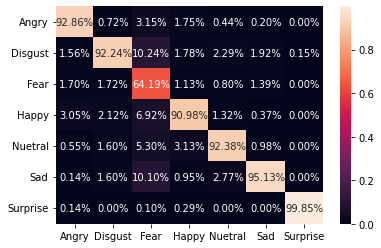

In [ ]:
# MLP Model

## Classification report 
print(classification_report(y_test_mlp,y_pred_mlp))
class_mlp = classification_report(y_test_mlp,y_pred_mlp, output_dict=True)

class_mlp = pd.DataFrame(class_mlp).transpose()
class_mlp.to_csv('Class_mlp.csv', index = False)
acc = float(accuracy_score(y_test_mlp,y_pred_mlp))*100
print("----accuracy score %s ----" % acc)

## Confusion matrix and its heatmap
cm_mlp = confusion_matrix(y_test_mlp,y_pred_mlp)
df_cm_mlp = pd.DataFrame(cm_mlp)
df_cm_mlp.to_csv('MLP.csv', index=False)
sn.heatmap(df_cm_mlp/np.sum(df_cm_mlp), 
           annot= True, fmt='.2%', 
           xticklabels= emotions,
           yticklabels=emotions)
plt.show()

              precision    recall  f1-score   support

       angry       0.80      0.84      0.82      2314
     disgust       0.64      0.65      0.65      2353
        fear       0.79      0.61      0.69      2365
       happy       0.74      0.68      0.71      2307
     neutral       0.69      0.70      0.70      2125
         sad       0.66      0.81      0.73      2299
    surprise       1.00      1.00      1.00       576

    accuracy                           0.73     14339
   macro avg       0.76      0.76      0.76     14339
weighted avg       0.73      0.73      0.73     14339

----accuracy score 72.80842457633028 ----


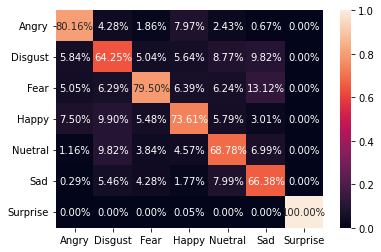

In [ ]:
# SVM Model

## Classification report 
print(classification_report(y_test_svm,y_pred_svm))
class_svm = classification_report(y_test_svm,y_pred_svm, output_dict=True)

class_svm = pd.DataFrame(class_svm).transpose()
class_svm.to_csv('Class_svm.csv', index = False)
acc = float(accuracy_score(y_test_svm,y_pred_svm))*100
print("----accuracy score %s ----" % acc)

## Confusion matrix and its heatmap
cm_svm = confusion_matrix(y_test_svm,y_pred_svm)
df_cm_svm = pd.DataFrame(cm_svm)
df_cm_svm.to_csv('SVM.csv', index=False)
sn.heatmap(df_cm_svm/np.sum(df_cm_svm), 
           annot= True, fmt='.2%', 
           xticklabels= emotions,
           yticklabels=emotions)
plt.show()

              precision    recall  f1-score   support

       angry       0.98      0.99      0.99     10496
     disgust       0.98      0.98      0.98     10579
        fear       0.98      0.98      0.98     10548
       happy       0.98      0.98      0.98     10498
     neutral       0.98      0.98      0.98      9361
         sad       0.98      0.98      0.98     10520
    surprise       1.00      1.00      1.00      2523

    accuracy                           0.98     64525
   macro avg       0.98      0.98      0.98     64525
weighted avg       0.98      0.98      0.98     64525

----accuracy score 98.13560635412631 ----


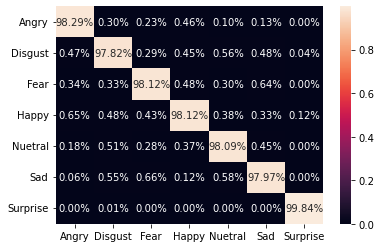

In [ ]:
#RNN Model
## Classification report
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Nuetral', 'Sad', 'Surprise']
print(classification_report(y_test_rnn,y_pred_rnn))
class_rnn = classification_report(y_test_rnn,y_pred_rnn, output_dict=True)

class_rnn = pd.DataFrame(class_rnn).transpose()
class_rnn.to_csv('Class_rnn.csv', index = False)
acc = float(accuracy_score(y_test_rnn,y_pred_rnn))*100
print("----accuracy score %s ----" % acc)

## Confusion matrix and its heatmap
cm_rnn = confusion_matrix(y_test_rnn,y_pred_rnn)
df_cm_rnn = pd.DataFrame(cm_rnn)
df_cm_rnn.to_csv('RNN.csv', index=False)
sn.heatmap(df_cm_rnn/np.sum(df_cm_rnn), 
           annot= True, fmt='.2%', 
           xticklabels= emotions,
           yticklabels=emotions)

plt.show()

#### Analysing stats of each emotion

In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Nuetral', 'Sad', 'Surprise']
class_cnn = pd.read_csv('Class_cnn.csv')
class_mlp = pd.read_csv('Class_mlp.csv')
class_svm = pd.read_csv('Class_svm.csv')
class_rnn = pd.read_csv('Class_rnn.csv')

precision = pd.DataFrame()
precision['CNN'] = class_cnn['precision']
precision['MLP'] = class_mlp['precision']
precision['SVM'] = class_svm['precision']
precision['RNN'] = class_rnn['precision']
precision = precision.iloc[0:7,:]
precision.index = emotions

recall = pd.DataFrame()
recall['CNN'] = class_cnn['recall']
recall['MLP'] = class_mlp['recall']
recall['SVM'] = class_svm['recall']
recall['RNN'] = class_rnn['recall']
recall = recall.iloc[0:7,:]
recall.index = emotions

score = pd.DataFrame()
score['CNN'] = class_cnn['f1-score']
score['MLP'] = class_mlp['f1-score']
score['SVM'] = class_svm['f1-score']
score['RNN'] = class_rnn['f1-score']
score = score.iloc[0:7,:]
score.index = emotions

Text(0, 0.5, 'percent level')

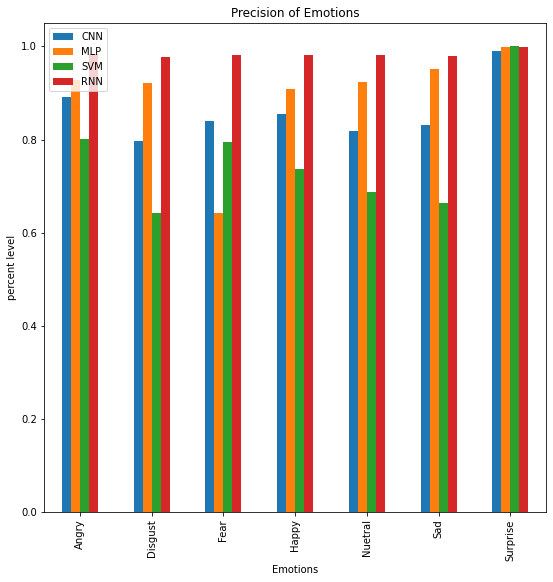

In [ ]:
# Plotting precision of each emotions in each models
precision.plot(kind = 'bar', title='emotions', figsize= (9,9))
plt.title('Precision of Emotions')
plt.xlabel('Emotions')
plt.ylabel('percent level')


Text(0, 0.5, 'percent level')

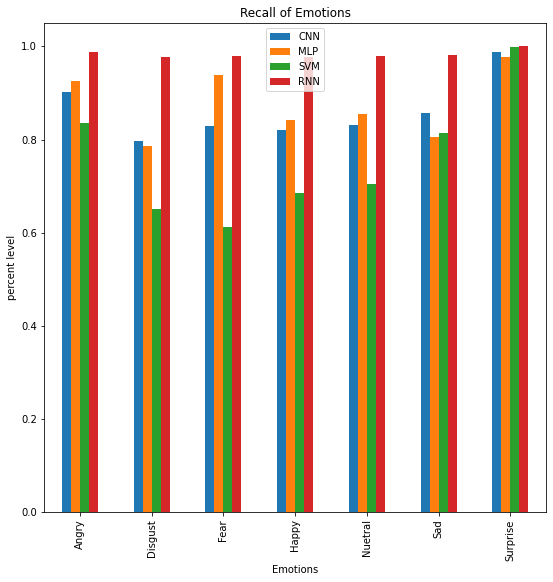

In [ ]:
# Plotting recall of each emotions in each models
recall.plot(kind = 'bar', title='emotions', figsize= (9,9))
plt.title('Recall of Emotions')
plt.xlabel('Emotions')
plt.ylabel('percent level')

Text(0, 0.5, 'percent level')

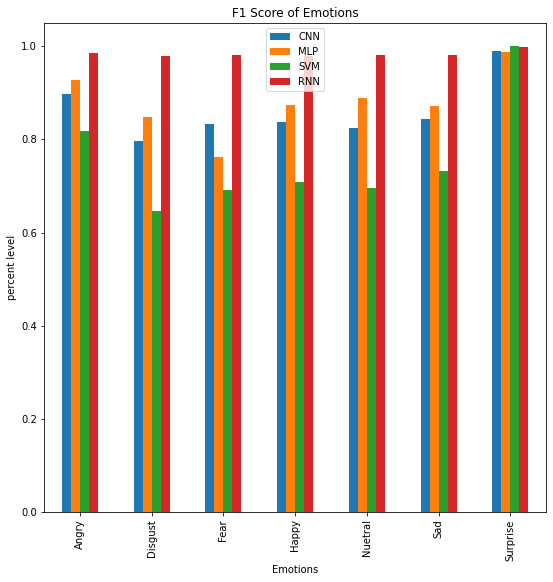

In [ ]:
# F1 score plot
score.plot(kind = 'bar', title='emotions', figsize= (9,9))
plt.title('F1 Score of Emotions')
plt.xlabel('Emotions')
plt.ylabel('percent level')